In [1]:
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
import torch.nn as nn

In [2]:
import os, sys

In [3]:
import matplotlib.pyplot as plt

In [4]:
from PIL import Image

In [5]:
import numpy as np
import imageio.v2 as imageio

In [6]:
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
from model_Net import *

In [8]:
def get_new_image(pth):
    
    img = Image.open(pth)
    imgGray = img.convert('L')
    arr = np.asarray(imgGray)
    
    return arr

In [9]:
def show_new_image(image_arr):
    arr = np.copy(image_arr)
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [10]:
def predict_new_labeled_image(image_arr, label):
    
    arr = np.copy(image_arr)
    img_sample = np.expand_dims(arr, axis=0)
    test_img = CustomDatasetFromImages(img_sample, np.array([label]))
    test_img_loader = DataLoader(test_img,batch_size=1,shuffle=False)
    
    with torch.no_grad():
        for i, data in enumerate(test_img_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
            im, true_label = data
            pred_output = gesture_model(im)
        
            pred = torch.max(pred_output, dim=1)
            pred_label = pred[1]
        
    return pred_label, true_label

In [11]:
def print_results(pred_label, true_label):
    pred = pred_label.item()+1
    label = true_label.item()+1
    print(f'Predicted class: {pred}, predicted gesture: {CLASS_NAMES[pred]}')
    print(f'True class: {label}, true gesture: {CLASS_NAMES[label]}')
    

In [12]:
gesture_model = Net()
optimizer = optim.SGD(gesture_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

checkpoint = torch.load('../Course_project/gesture_classification_model.pt')
gesture_model.load_state_dict(checkpoint)


<All keys matched successfully>

In [13]:
img_sample = imageio.imread('../Course_project/frame_04_06_0018.png')

In [14]:
im_pred_label, im_true_label = predict_new_labeled_image(img_sample, 6)

C:\Users\Armik\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [15]:
print_results(im_pred_label, im_true_label)

Predicted class: 6, predicted gesture: index
True class: 6, true gesture: index


In [16]:
img_01 = get_new_image('3.jpg')

In [17]:
pred_01, true_01 = predict_new_labeled_image(img_01, 3)

In [18]:
print_results(pred_01, true_01)

Predicted class: 10, predicted gesture: down
True class: 3, true gesture: fist


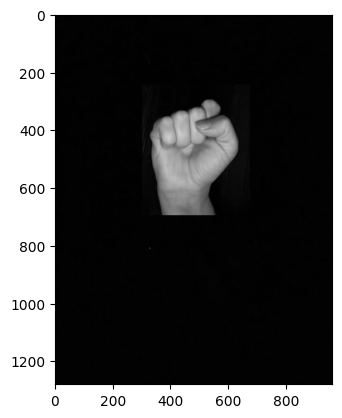

In [19]:
show_new_image(img_01)

In [20]:
img_02 = get_new_image('4.jpg')

In [21]:
pred_02, true_02 = predict_new_labeled_image(img_02, 4)

In [22]:
print_results(pred_02, true_02)

Predicted class: 9, predicted gesture: c
True class: 4, true gesture: fist_moved


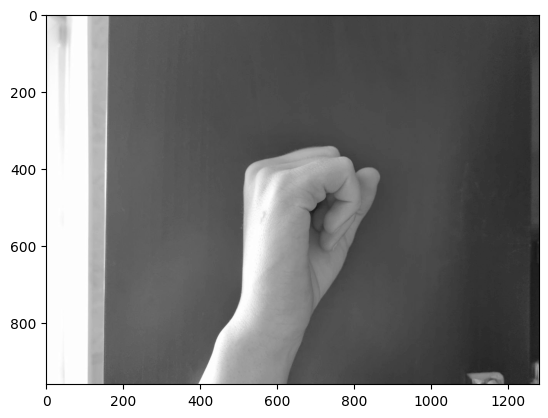

In [23]:
show_new_image(img_02)

In [24]:
img_03 = get_new_image('5.jpg')

In [25]:
pred_03, true_03 = predict_new_labeled_image(img_03, 5)

In [26]:
print_results(pred_03, true_03)

Predicted class: 8, predicted gesture: palm_moved
True class: 5, true gesture: thumb


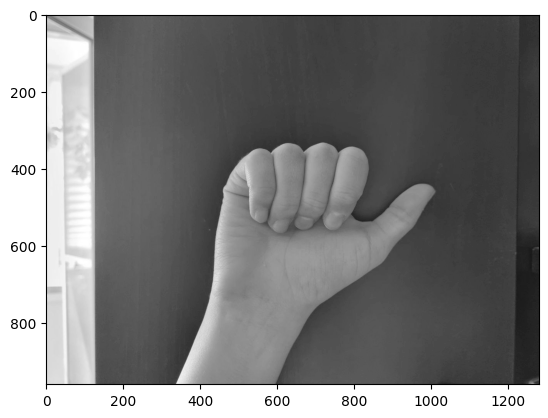

In [27]:
show_new_image(img_03)

In [28]:
img_04 = get_new_image('7.jpg')

In [29]:
pred_04, true_04 = predict_new_labeled_image(img_04, 7)

In [30]:
print_results(pred_04, true_04)

Predicted class: 5, predicted gesture: thumb
True class: 7, true gesture: ok


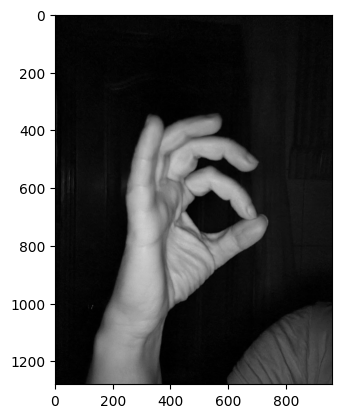

In [31]:
show_new_image(img_04)

**The training images are LEAP Motion Sensor infrared captures. Such photoes can't be made by a standard mobile camera**   
**As we can see the model works quite well on test dataset (99.8% accuracy), so it should be used for the corresponding task of classifying infrared motion sensor's output**